In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
tweets = pd.read_csv("tweets.csv")

In [3]:
tweets

,id,id_str,user_location,user_bg_color,retweet_count,user_name,polarity,created,geo,user_description,user_created,user_followers,coordinates,subjectivity,text
0,1,729828033092149248,Wheeling WV,022330,0,Jaybo26003,0.000000,2016-05-10T00:18:57,NaN,NaN,2011-11-17T02:45:42,39,NaN,0.000000,Make a difference vote! WV Bernie Sanders Coul...
1,2,729828033092161537,NaN,C0DEED,0,brittttany_ns,0.150000,2016-05-10T00:18:57,NaN,18 // PSJAN,2012-12-24T17:33:12,1175,NaN,0.100000,RT @HlPHOPNEWS: T.I. says if Donald Trump wins...
2,3,729828033566224384,NaN,C0DEED,0,JeffriesLori,0.000000,2016-05-10T00:18:57,NaN,NaN,2012-10-11T14:29:59,42,NaN,0.000000,You have no one to blame but yourselves if Tru...
3,4,729828033893302272,global,C0DEED,0,WhorunsGOVs,0.000000,2016-05-10T00:18:57,NaN,Get Latest Global Political news as they unfold,2014-02-16T07:34:24,290,NaN,0.000000,'Ruin the rest of their lives': Donald Trump c...
4,5,729828034178482177,"California, USA",131516,0,BJCG0830,0.000000,2016-05-10T00:18:57,NaN,Queer Latino invoking his 1st amendment privil...,2009-03-21T01:43:26,354,NaN,0.000000,"RT @elianayjohnson: Per source, GOP megadonor ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237475,237476,730091164498575365,Karachi,C0DEED,0,DHQLounge,-0.035714,2016-05-10T17:44:32,NaN,Its all about Digital World!,2013-12-20T11:20:21,558,NaN,0.607143,#Dating site pairs Americans fleeing a possibl...
237476,237477,730091164779454464,NaN,C0DEED,0,MguzmanMichele,0.000000,2016-05-10T17:44:32,NaN,NaN,2015-09-11T15:31:36,87,NaN,0.000000,"RT @lea_ejanda: Bernie Sanders Sacramento, Cal..."
237477,237478,730091165052080128,Melbourne,C0DEED,0,RaisingHopeAust,-0.316667,2016-05-10T17:44:32,NaN,"Study conflict zones, analysis, politics, no a...",2011-04-09T02:04:10,530,NaN,0.516667,RT @ShaunKing: DISGUSTING.\n\nA Trump supporti...
237478,237479,730091165157105665,"Petal, MS/Oxford, MS",C0DEED,0,CoonandFriends3,0.011111,2016-05-10T17:44:32,NaN,UM | Secy of @YoungDemsMS | Pres of @um_democr...,2012-01-19T03:43:47,870,NaN,0.288889,RT @MayorofLondon: Trump's ignorant view of Is...


In [4]:
tweets.head()

,id,id_str,user_location,user_bg_color,retweet_count,user_name,polarity,created,geo,user_description,user_created,user_followers,coordinates,subjectivity,text
0,1,729828033092149248,Wheeling WV,022330,0,Jaybo26003,0.00,2016-05-10T00:18:57,NaN,NaN,2011-11-17T02:45:42,39,NaN,0.0,Make a difference vote! WV Bernie Sanders Coul...
1,2,729828033092161537,NaN,C0DEED,0,brittttany_ns,0.15,2016-05-10T00:18:57,NaN,18 // PSJAN,2012-12-24T17:33:12,1175,NaN,0.1,RT @HlPHOPNEWS: T.I. says if Donald Trump wins...
2,3,729828033566224384,NaN,C0DEED,0,JeffriesLori,0.00,2016-05-10T00:18:57,NaN,NaN,2012-10-11T14:29:59,42,NaN,0.0,You have no one to blame but yourselves if Tru...
3,4,729828033893302272,global,C0DEED,0,WhorunsGOVs,0.00,2016-05-10T00:18:57,NaN,Get Latest Global Political news as they unfold,2014-02-16T07:34:24,290,NaN,0.0,'Ruin the rest of their lives': Donald Trump c...
4,5,729828034178482177,"California, USA",131516,0,BJCG0830,0.00,2016-05-10T00:18:57,NaN,Queer Latino invoking his 1st amendment privil...,2009-03-21T01:43:26,354,NaN,0.0,"RT @elianayjohnson: Per source, GOP megadonor ..."


In [5]:
tweets.columns

Index(['id', 'id_str', 'user_location', 'user_bg_color', 'retweet_count',
       'user_name', 'polarity', 'created', 'geo', 'user_description',
       'user_created', 'user_followers', 'coordinates', 'subjectivity',
       'text'],
      dtype='object')

In [6]:
def get_candidate(row):
    candidates = []
    text = row["text"].lower()
    if "clinton" in text or "hillary" in text:
        candidates.append("clinton")
    if "trump" in text or "donald" in text:
        candidates.append("trump")
    if "sanders" in text or "bernie" in text:
        candidates.append("sanders")
    return ",".join(candidates)
tweets["candidate"] = tweets.apply(get_candidate,axis=1)

In [7]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237480 entries, 0 to 237479
Data columns (total 16 columns):
id                  237480 non-null int64
id_str              237480 non-null int64
user_location       153514 non-null object
user_bg_color       237480 non-null object
retweet_count       237480 non-null int64
user_name           237480 non-null object
polarity            237480 non-null float64
created             237480 non-null object
geo                 125 non-null object
user_description    191850 non-null object
user_created        237480 non-null object
user_followers      237480 non-null int64
coordinates         125 non-null object
subjectivity        237480 non-null float64
text                237480 non-null object
candidate           237480 non-null object
dtypes: float64(2), int64(4), object(10)
memory usage: 29.0+ MB


In [8]:
tweets["candidate"]

0         clinton,sanders
1                   trump
2                   trump
3                   trump
4                   trump
               ...       
237475              trump
237476            sanders
237477      trump,sanders
237478              trump
237479      clinton,trump
Name: candidate, Length: 237480, dtype: object

In [9]:
import matplotlib.pyplot as plt
import numpy as np

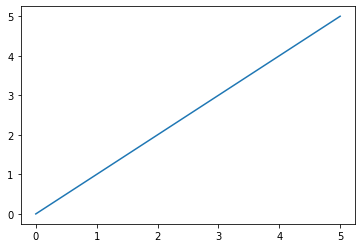

In [10]:
plt.plot([0,1,2,3,4,5])

Text(0, 0.5, 'Y axis')

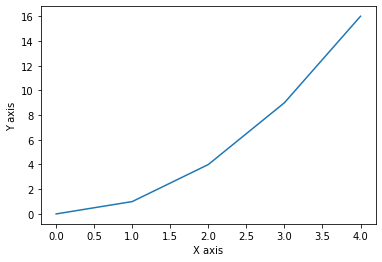

In [11]:
plt.plot([0,1,2,3,4],[0,1,4,9,16])
plt.xlabel("X axis")
plt.ylabel("Y axis")

In [12]:
sales= [1, 4, 9, 16, 25,36,49, 64]
tv = [1, 16, 30, 42,55, 68, 77,88]
radio = [1,6,12,18,28, 40, 52, 65]

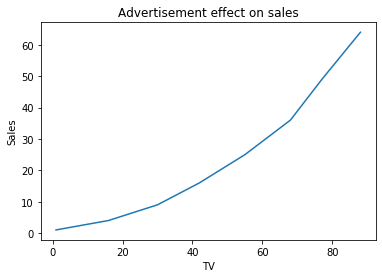

In [13]:
plt.plot(tv, sales)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Advertisement effect on sales')
plt.show()

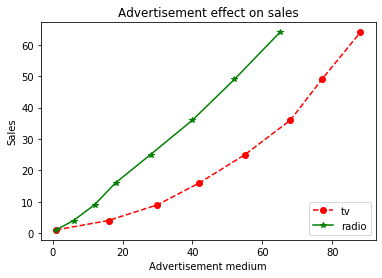

In [14]:
plt.plot(tv,sales, marker='o', linestyle='--', color='r',label='tv')
plt.plot(radio,sales, marker='*', linestyle='-', color='g', label='radio')
plt.xlabel('Advertisement medium')
plt.ylabel('Sales')
plt.title('Advertisement effect on sales')
plt.legend(loc='lower right')
plt.show()

In [15]:
counts = tweets["candidate"].value_counts()
counts

trump                    119998
clinton,trump             30521
                          25429
sanders                   25351
clinton                   22746
clinton,sanders            6044
clinton,trump,sanders      4219
trump,sanders              3172
Name: candidate, dtype: int64

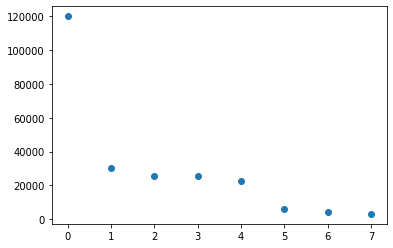

In [16]:
plt.scatter(range(len(counts)), counts)
plt.show()


In [17]:
tweets["created"] = pd.to_datetime(tweets["created"])
tweets["user_created"] = pd.to_datetime(tweets["user_created"])

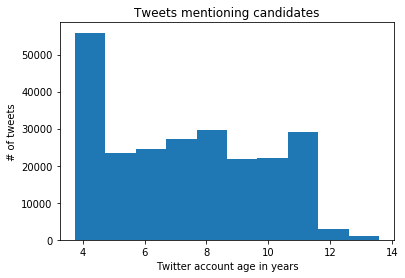

In [18]:
tweets["user_age"] = tweets["user_created"].apply(lambda x: (datetime.now() - x).total_seconds() / 3600 / 24 / 365)
plt.hist(tweets["user_age"])
plt.title("Tweets mentioning candidates")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.show()

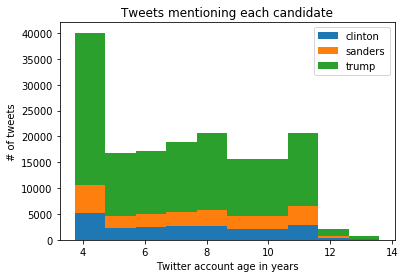

In [19]:
cl_tweets = tweets["user_age"][tweets["candidate"] == "clinton"]
sa_tweets = tweets["user_age"][tweets["candidate"] == "sanders"]
tr_tweets = tweets["user_age"][tweets["candidate"] == "trump"]
plt.hist([
         cl_tweets,
         sa_tweets,
         tr_tweets
    ],
     stacked=True,
     label=["clinton", "sanders", "trump"])
plt.legend()
plt.title("Tweets mentioning each candidate")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.show()

In [20]:
import matplotlib.colors as colors
tweets["red"] = tweets["user_bg_color"].apply(lambda x: colors.hex2color('#{0}'.format(x))[0])
tweets["blue"] = tweets["user_bg_color"].apply(lambda x: colors.hex2color('#{0}'.format(x))[2])

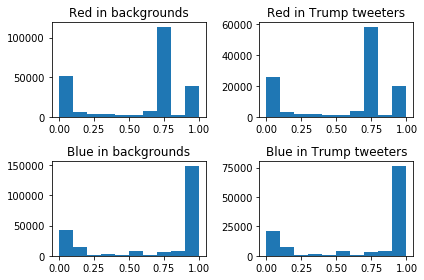

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flat

ax0.hist(tweets["red"])
ax0.set_title('Red in backgrounds')

ax1.hist(tweets["red"][tweets["candidate"] == "trump"].values)
ax1.set_title('Red in Trump tweeters')

ax2.hist(tweets["blue"])
ax2.set_title('Blue in backgrounds')

ax3.hist(tweets["blue"][tweets["candidate"] == "trump"].values)
ax3.set_title('Blue in Trump tweeters')
plt.tight_layout()
plt.show()

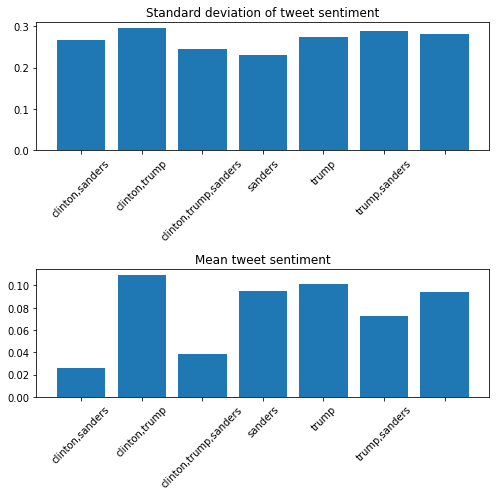

In [22]:
gr = tweets.groupby("candidate").agg([np.mean, np.std])

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))
ax0, ax1 = axes.flat

std = gr["polarity"]["std"].iloc[1:]
mean = gr["polarity"]["mean"].iloc[1:]
ax0.bar(range(len(std)), std)
ax0.set_xticklabels(std.index, rotation=45)
ax0.set_title('Standard deviation of tweet sentiment')

ax1.bar(range(len(mean)), mean)
ax1.set_xticklabels(mean.index, rotation=45)
ax1.set_title('Mean tweet sentiment')

plt.tight_layout()
plt.show()


In [23]:
gr

id                            id_str  \
                                mean           std                mean   
candidate                                                                
                       114051.183688  69038.411631  729989453839915392   
clinton                115994.642443  69871.102687  729988642607237504   
clinton,sanders        123473.587359  64977.660362  730011481452253440   
clinton,trump          118149.376659  68119.530321  729998900142776576   
clinton,trump,sanders  134276.423560  57926.692201  730041882827746176   
sanders                122447.602856  68065.594317  730003281480133376   
trump                  118798.472241  68853.491237  729995756662231168   
trump,sanders          120208.159836  66415.967730  730002471407623936   

                                    retweet_count       polarity            \
                                std          mean  std      mean       std   
candidate                                                                    
                       1.139204e+14             0  0.0  0.048885  0.289333   
clinton                1.148107e+14             0  0.0  0.026005  0.267020   
clinton,sanders        1.040853e+14             0  0.0  0.109311  0.294225   
clinton,trump          1.105836e+14             0  0.0  0.038789  0.244355   
clinton,trump,sanders  7.844409e+13             0  0.0  0.094801  0.230442   
sanders                1.090488e+14             0  0.0  0.101664  0.274370   
trump                  1.121942e+14             0  0.0  0.072180  0.287278   
trump,sanders          1.084844e+14             0  0.0  0.094110  0.281690   

                      user_followers                subjectivity            \
                                mean            std         mean       std   
candidate                                                                    
                         4641.061308   54755.981311     0.276616  0.341894   
clinton                  7758.054955  209809.505874     0.268818  0.314952   
clinton,sanders          4481.819325   60464.982065     0.300500  0.316764   
clinton,trump            8143.059336  154826.249151     0.264287  0.309343   
clinton,trump,sanders    6215.479498  203374.625549     0.348322  0.316337   
sanders                  3650.571812   40678.416413     0.283606  0.320596   
trump                    9526.672786  262583.312202     0.294326  0.323274   
trump,sanders            7820.137137  200375.334077     0.307191  0.307962   

                       user_age                 red                blue  \
                           mean       std      mean       std      mean   
candidate                                                                 
                       7.534638  2.524116  0.554687  0.354548  0.654722   
clinton                7.322501  2.498144  0.580907  0.344258  0.689780   
clinton,sanders        7.447236  2.491408  0.551454  0.355468  0.650755   
clinton,trump          7.049652  2.378121  0.602982  0.335776  0.714623   
clinton,trump,sanders  7.472234  2.544048  0.558014  0.359498  0.656357   
sanders                7.480997  2.518182  0.554871  0.354363  0.654992   
trump                  7.243460  2.494298  0.587575  0.343957  0.691149   
trump,sanders          7.513973  2.549388  0.567172  0.350220  0.673444   

                                 
                            std  
candidate                        
                       0.391827  
clinton                0.376897  
clinton,sanders        0.391646  
clinton,trump          0.367081  
clinton,trump,sanders  0.392673  
sanders                0.389118  
trump                  0.377203  
trump,sanders          0.384011

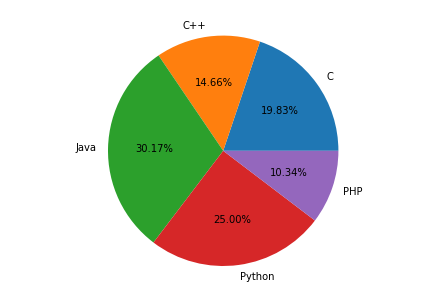

In [24]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ['C', 'C++', 'Java', 'Python', 'PHP']
students = [23,17,35,29,12]
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.show()